# *`DATA PROCESSING`*
*Leveraging Spark and its libraries like pandas, we employ advanced data processing techniques to analyze our data for the airstrikes impacted by birds. This involves cleaning and processing our data which will then be used for analytical purpose*

---


### $Importing$ $and$ $Cleaning$ $of$ $Data$
In this section, pyspark session is initiated, and the data is cleaned using different techniques after importing it from Cloud Storage.

#### Intiate Spark Session

In [12]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("strikereport").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/09 16:56:49 INFO SparkEnv: Registering MapOutputTracker
23/12/09 16:56:49 INFO SparkEnv: Registering BlockManagerMaster
23/12/09 16:56:49 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
23/12/09 16:56:49 INFO SparkEnv: Registering OutputCommitCoordinator


#### Importing the CSV file from Google Bucket using GSUTIL URL

In [15]:
path = 'gs://strike_report/strike_report_clean.csv'  # Load the data using gsutil url
file_type = "csv"

# Delimiters and schema type for CSV
infer_schema = 'true'
first_row_is_header = 'true'
delimiter = ','

# birdstrike is our DataFrame name
birdstrike = spark.read.format(file_type)\
    .option("inferSchema", infer_schema)\
    .option("header", first_row_is_header)\
    .option("sep", delimiter)\
    .load(path)


#### Dataframe/ Schema 
Observing a table schema helps in understanding the layout of our dataframe along with the datatypes which is helpful for analytical purpose.

In [16]:
birdstrike.printSchema()

root
 |-- INDEX_NR: integer (nullable = true)
 |-- INCIDENT_MONTH: integer (nullable = true)
 |-- INCIDENT_YEAR: integer (nullable = true)
 |-- AIRPORT_ID: string (nullable = true)
 |-- AIRPORT: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- FAAREGION: string (nullable = true)
 |-- OPERATOR: string (nullable = true)
 |-- AMA: string (nullable = true)
 |-- AMO: string (nullable = true)
 |-- EMA: integer (nullable = true)
 |-- EMO: integer (nullable = true)
 |-- AC_CLASS: string (nullable = true)
 |-- AC_MASS: integer (nullable = true)
 |-- TYPE_ENG: string (nullable = true)
 |-- PHASE_OF_FLIGHT: string (nullable = true)
 |-- HEIGHT: integer (nullable = true)
 |-- SPEED: integer (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- SKY: string (nullable = true)
 |-- PRECIPITATION: string (nullable = true)
 |-- DAMAGE_LEVEL: string (nullable = true)
 |-- STR_RAD: boolean (nullable = true)
 |-- DAM_RAD: boolean (nullable = true)
 |-- STR_WINDSHLD: boolean (null

#### Dataframe View

In [17]:
import pandas as pd #importing panda libraries

pandas_df = birdstrike.toPandas() #naming the panda datafrme as pandas_df

pandas_df.head() # Displaying top 5 rows

23/12/09 16:59:06 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,AIRPORT_ID,AIRPORT,STATE,FAAREGION,OPERATOR,AMA,AMO,...,STR_OTHER,DAM_OTHER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,SIZE,SOURCE
0,608242,6,1996,KSMF,SACRAMENTO INTL,CA,AWP,UNITED AIRLINES,148,24,...,False,False,UNKBM,Unknown bird - medium,BLOOD ON L FWD NOSE AREA SEEN BY CREW AFTER LDG.,FALSE,FALSE,Unknown,Medium,Air Transport Report
1,608243,6,1996,KDEN,DENVER INTL AIRPORT,CO,ANM,UNITED AIRLINES,148,24,...,False,False,UNKBM,Unknown bird - medium,CREW SUSPECTED BIRDSTRIKE ON T/O. LOOKED LIKE ...,FALSE,FALSE,Unknown,Medium,Air Transport Report
2,608244,7,1996,KOMA,EPPLEY AIRFIELD,NE,ACE,UNITED AIRLINES,148,26,...,False,False,UNKBM,Unknown bird - medium,BIRDSTRIKE AT ROTATION. INSPN. NO DMG.,FALSE,FALSE,Unknown,Medium,Air Transport Report
3,608245,7,1996,KIAD,WASHINGTON DULLES INTL ARPT,DC,AEA,UNITED AIRLINES,04A,3,...,False,False,UNKBM,Unknown bird - medium,"ON FINAL APCH, STRIKE UNDER THE NOSE OF THE CO...",FALSE,FALSE,Unknown,Medium,Air Transport Report
4,608246,7,1996,KLGA,LA GUARDIA ARPT,NY,AEA,UNITED AIRLINES,04A,3,...,False,False,UNKBM,Unknown bird - medium,LOUD NOISE WAS HEARD DURING CLIMBOUT THAT SOUN...,FALSE,FALSE,Unknown,Medium,Air Transport Report


---

#### Null Values

In [41]:
pandas_df.info()  #gives the view of all the null values in our schema

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253384 entries, 0 to 253383
Data columns (total 62 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INDEX_NR           253384 non-null  int32  
 1   INCIDENT_MONTH     253384 non-null  int32  
 2   INCIDENT_YEAR      253384 non-null  int32  
 3   AIRPORT_ID         253384 non-null  object 
 4   AIRPORT            253384 non-null  object 
 5   STATE              253307 non-null  object 
 6   FAAREGION          253307 non-null  object 
 7   OPERATOR           253384 non-null  object 
 8   AMA                170483 non-null  object 
 9   AMO                158694 non-null  object 
 10  EMA                159392 non-null  float64
 11  EMO                155074 non-null  float64
 12  AC_CLASS           253384 non-null  object 
 13  AC_MASS            171443 non-null  float64
 14  TYPE_ENG           253384 non-null  object 
 15  PHASE_OF_FLIGHT    171967 non-null  object 
 16  HE

##### Handling Null Values

*Managing null values is an important aspect of Data Analysis. Refer to Data Dictionary for more information about the dataframe*

In [10]:
# null values in column to be replaced with Y for other Aircraft class type
pandas_df['AC_CLASS'] = pandas_df['AC_CLASS'].fillna('Y')

# dropping columns that has state and FAA regions as null as those airports are privately owned or is being operated in remote water bodies or part of oil rig companies
pandas_df.dropna(subset=['STATE', 'FAAREGION'], inplace=True)

#Changing the NULL values in TYPE_ENG to Y (others) based on data dictionary regulations
pandas_df['TYPE_ENG'] = pandas_df['TYPE_ENG'].fillna('Y')  #filling iwth Y as it means other

# missing values in damage level to be replaced with M? (Undetermined level)
pandas_df['DAMAGE_LEVEL'] = pandas_df['DAMAGE_LEVEL'].fillna('M?')

#missing values in size column of data frame to be replaced with Unknown
pandas_df['SIZE'] = pandas_df['SIZE'].fillna('UNKNOWN')

NameError: name 'pandas_df' is not defined

##### Counting the null values in above operated columns to verify

In [43]:
null_counts_after_operations = pandas_df[['AC_CLASS', 'STATE', 'FAAREGION', 'TYPE_ENG', 'DAMAGE_LEVEL', 'SIZE']].isnull().sum()

print(null_counts_after_operations)

AC_CLASS        0
STATE           0
FAAREGION       0
TYPE_ENG        0
DAMAGE_LEVEL    0
SIZE            0
dtype: int64



<div class="alert alert-block alert-success">
<b>Final Dataframe is now ready for analytical research</b>
</div>

---
# *`DATA VISUALIZATIONS`*
*Using Spark and its libraries like matplotlib we aim to visualize our data in form of charts, tables or graphs which makes it easier for us to derive meaningful insights*

##### AIRCRAFT DAMAGE DISTRIBUTION
Visualize the distribution of damage caused to aircraft by wildlife strikes.

Aircraft is divided into 4 segements of damage:
 1. Engine Damage: Damage to any engine
 2. Body Damage: Damage to Nose, Windshield, Tail, Radome, Lights and Other
 3. Functionality Damage: Damage to propeller, wings, landing gear, fuselage
 4. Other Damage

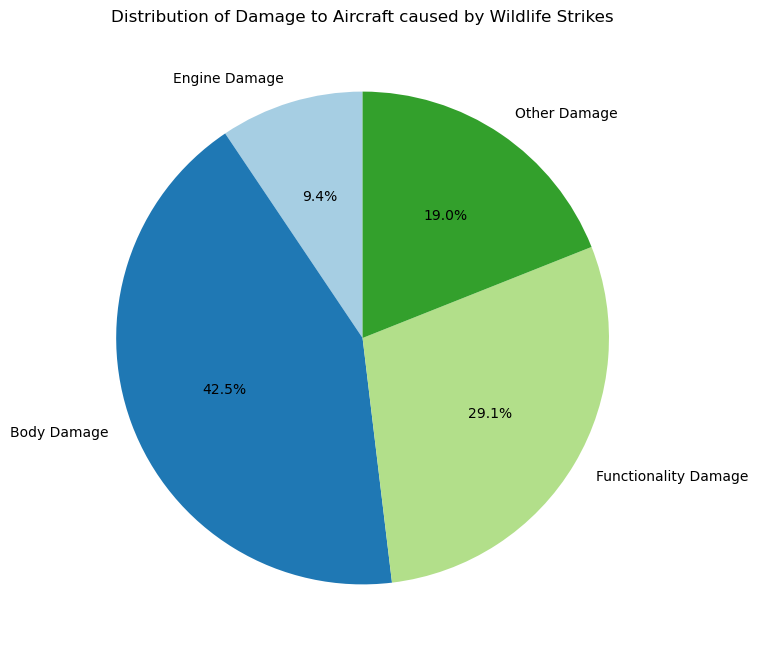

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

Engine_Damage = ['STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4']
Body_Damage = ['STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_LGHTS', 'DAM_LGHTS', 'STR_TAIL', 'DAM_TAIL']
Functionality_Damage = ['STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG']
Other_Damage = ['STR_OTHER', 'DAM_OTHER']

# Create new columns for damage segments
pandas_df['Engine Damage'] = pandas_df[Engine_Damage].any(axis=1).astype(int)
pandas_df['Body Damage'] = pandas_df[Body_Damage].any(axis=1).astype(int)
pandas_df['Functionality Damage'] = pandas_df[Functionality_Damage].any(axis=1).astype(int)
pandas_df['Other Damage'] = pandas_df[Other_Damage].any(axis=1).astype(int)
pandas_df['Damage_Group'] = 'No_Damage'  # no damage to aircraft

for damage_group, damage_columns in damage_groups.items():
    pandas_df.loc[pandas_df[damage_columns].any(axis=1), 'Damage_Group'] = damage_group


# Calculate the total count of strikes for each damage group
damage_groups = ['Engine Damage', 'Body Damage', 'Functionality Damage', 'Other Damage']
damage_counts = pandas_df[damage_groups].sum()

# Create a pie chart
labels = ['Engine Damage', 'Body Damage', 'Functionality Damage', 'Other Damage']
plt.figure(figsize=(12, 8))
plt.pie(damage_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Damage to Aircraft caused by Wildlife Strikes')
plt.show()

##### TIME SERIES ANALYSIS
Visualize the number of strikes occuring over the years

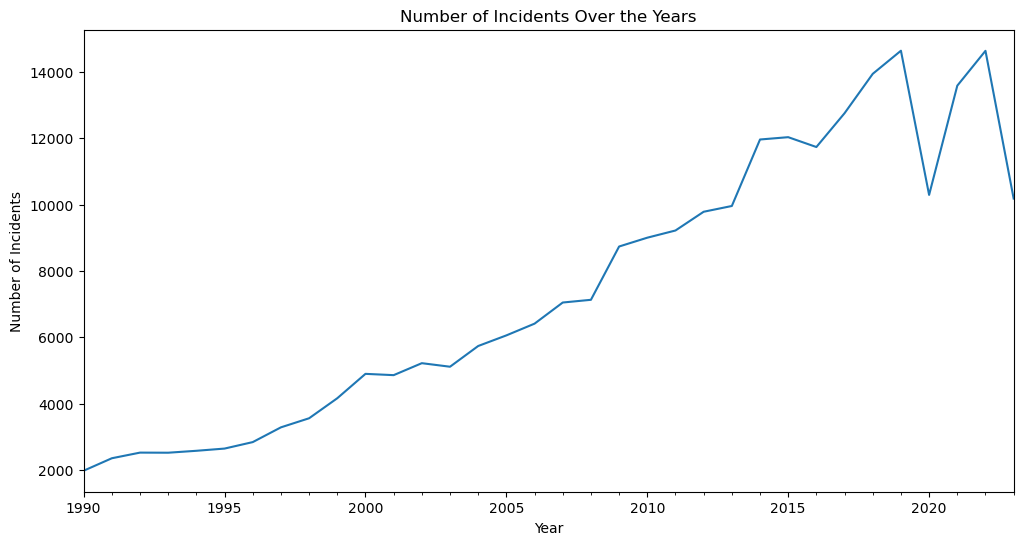

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pandas_df['INCIDENT_DATE'] = pd.to_datetime(pandas_df['INCIDENT_YEAR'], format='%Y')
pandas_df.set_index('INCIDENT_DATE', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
pandas_df.resample('Y').size().plot(title='Number of Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()


##### DAMAGE TYPE vs. AIRCRAFT CLASS
Visualize the damage incurred by different aircraft types.

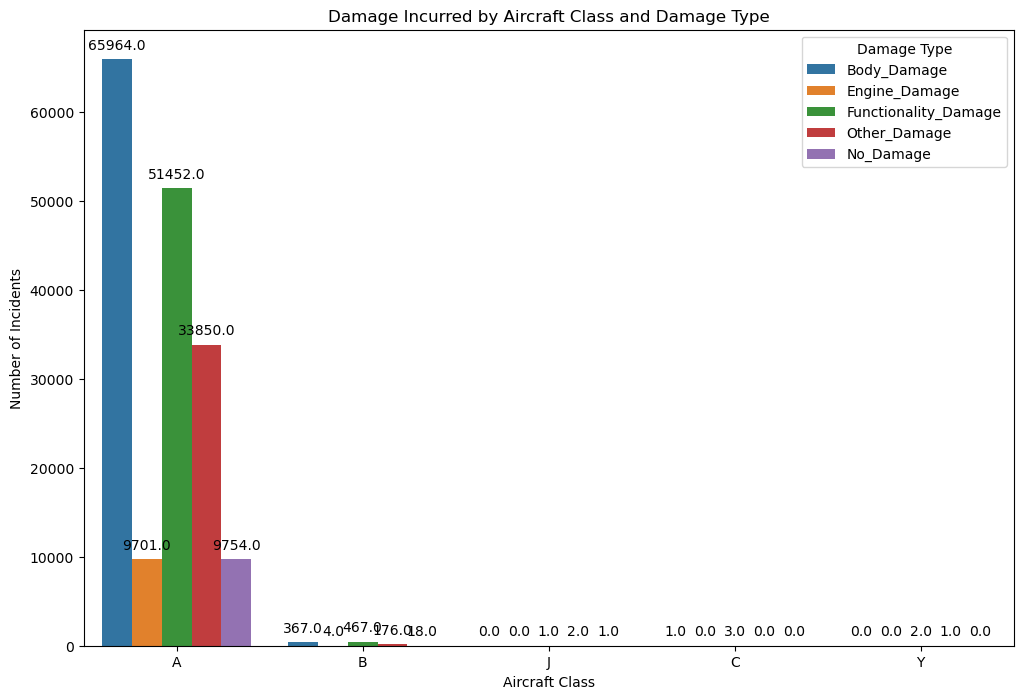

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

damage_groups = {
    'Engine_Damage': ['STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4'],
    'Body_Damage': ['STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_LGHTS', 'DAM_LGHTS', 'STR_TAIL', 'DAM_TAIL'],
    'Functionality_Damage': ['STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG'],
    'Other_Damage': ['STR_OTHER', 'DAM_OTHER']
}

pandas_df['Damage_Group'] = 'No_Damage'  # no damage to aircraft

for damage_group, damage_columns in damage_groups.items():
    pandas_df.loc[pandas_df[damage_columns].any(axis=1), 'Damage_Group'] = damage_group

# Plot the graph
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='AC_CLASS', hue='Damage_Group', data=pandas_df)
#data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Damage Incurred by Aircraft Class and Damage Type')
plt.xlabel('Aircraft Class')
plt.ylabel('Number of Incidents')
plt.legend(title='Damage Type', loc='upper right')
plt.show()

##### SPECIES ANALYSIS
Top 10 species indulged in airstrikes

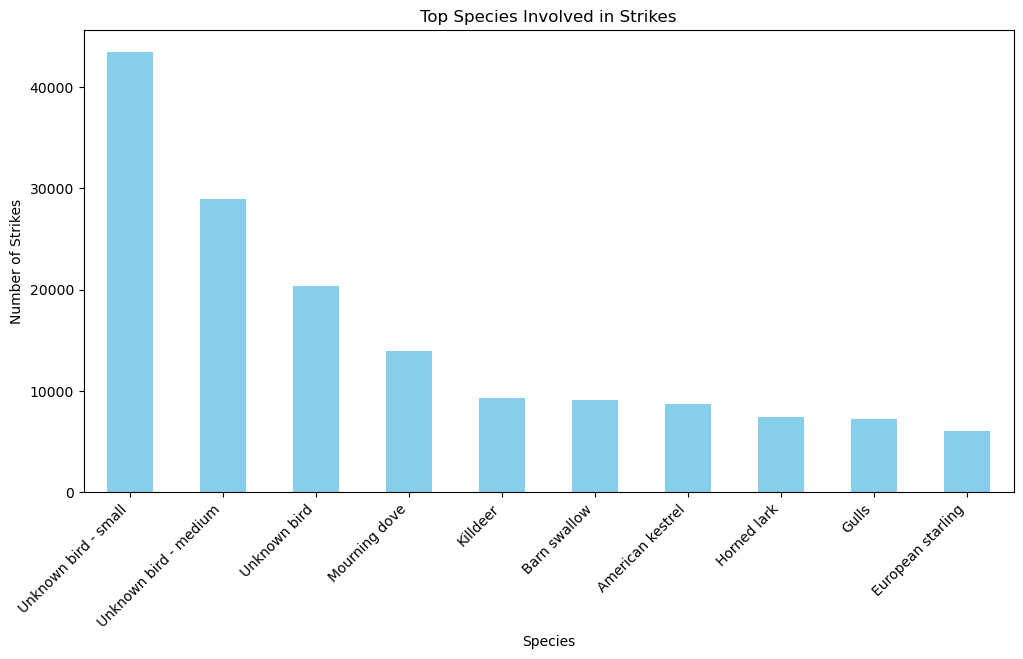

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

species_df = pandas_df[['SPECIES']]

# Count the occurrences of each species
species_counts = species_df['SPECIES'].value_counts()

    # Select the top 10 species
top_species = species_counts.head(10)

    # Plotting the bar chart
plt.figure(figsize=(12, 6))
top_species.plot(kind='bar', color='skyblue')
    
plt.xlabel('Species')
plt.ylabel('Number of Strikes')
plt.title('Top Species Involved in Strikes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

##### AIRCRAFT DAMAGE DISTRIBUTION BY FAA Regions
Identify and visualize the FAA regions over the years that took the highest damage

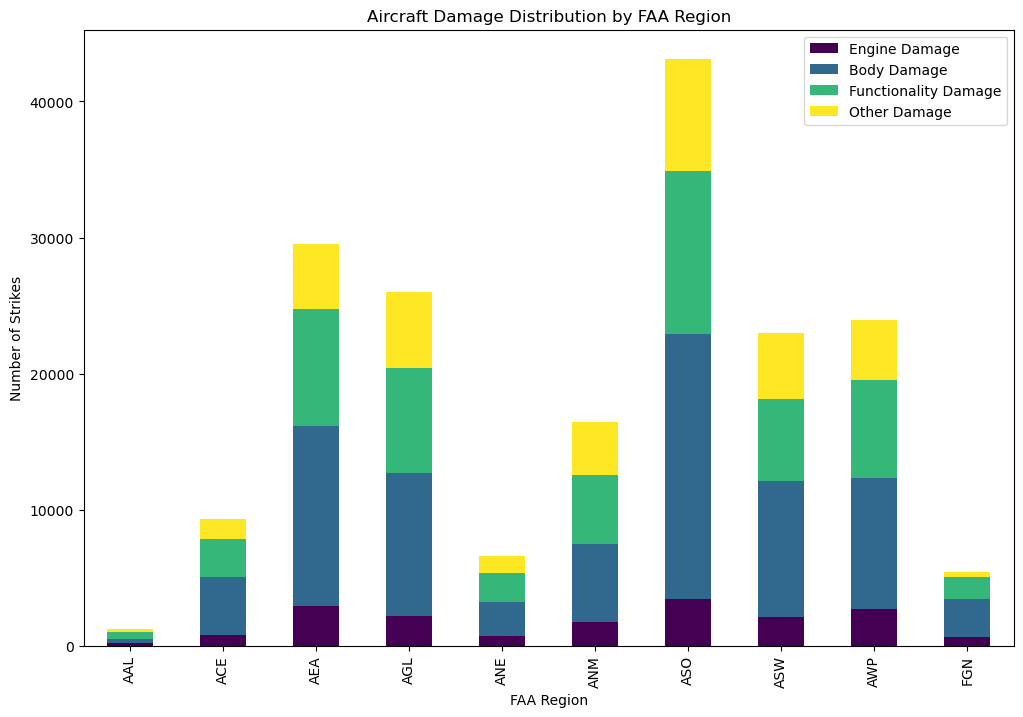

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

damage_columns = ['Engine Damage', 'Body Damage', 'Functionality Damage', 'Other Damage', 'FAAREGION']
damage_subset = pandas_df[damage_columns]

# Group by FAA region and calculate the sum of damage types
damage_by_region = damage_subset.groupby('FAAREGION').sum()

# Bar graph
damage_by_region.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding labels and title
plt.xlabel('FAA Region')
plt.ylabel('Number of Strikes')
plt.title('Aircraft Damage Distribution by FAA Region')

# show
plt.show()


##### AIRCRAFT STRIKE ANALYSIS FOR THE YEAR 2022 BASED ON MONTHS and FAA REGION
Visualising the years 2022 based on months and FAA regions.

/tmp/ipykernel_3520/49049318.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INCIDENT_DATE'] = pd.to_datetime(filtered_df['INCIDENT_YEAR'].astype(str) + '-' + filtered_df['INCIDENT_MONTH'].astype(str) + '-01')
/tmp/ipykernel_3520/49049318.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['INCIDENT_DATE'].dt.strftime('%B')
/tmp/ipykernel_3520/49049318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

<Figure size 1400x600 with 0 Axes>

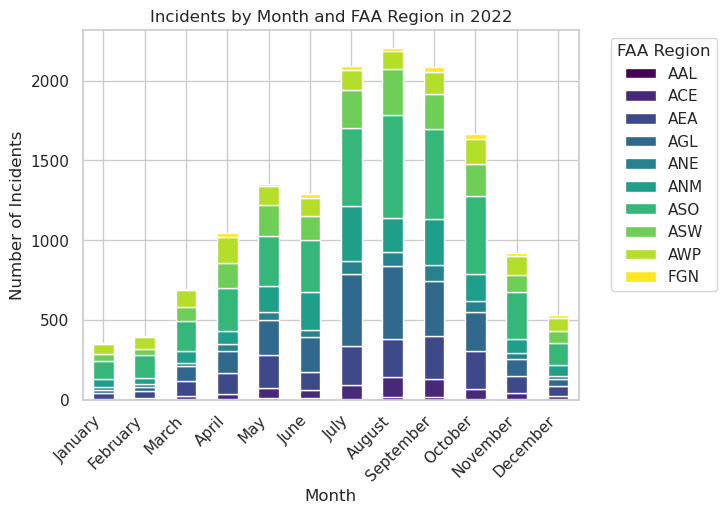

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for incidents in the year 2022
filtered_df = pandas_df[pandas_df['INCIDENT_YEAR'] == 2022]

# Combine 'INCIDENT_MONTH' and 'INCIDENT_YEAR' to create a new 'INCIDENT_DATE' column
filtered_df['INCIDENT_DATE'] = pd.to_datetime(filtered_df['INCIDENT_YEAR'].astype(str) + '-' + filtered_df['INCIDENT_MONTH'].astype(str) + '-01')

# Extract month, year, and FAA region
filtered_df['Month'] = filtered_df['INCIDENT_DATE'].dt.strftime('%B')
filtered_df['Year'] = filtered_df['INCIDENT_DATE'].dt.year

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' column to Categorical with specified order
filtered_df['Month'] = pd.Categorical(filtered_df['Month'], categories=month_order, ordered=True)

# Count the occurrences by FAA region, year, and month
incidents_by_month_region = filtered_df.groupby(['Month', 'FAAREGION']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 6))
incidents_by_month_region.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Incidents by Month and FAA Region in 2022')
plt.xticks(rotation=45, ha='right')
plt.legend(title='FAA Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### AIRPORTS WITH HIGHEST AIRSTRIKES
Visualize the top 15 airports that observed the highest airstrikes

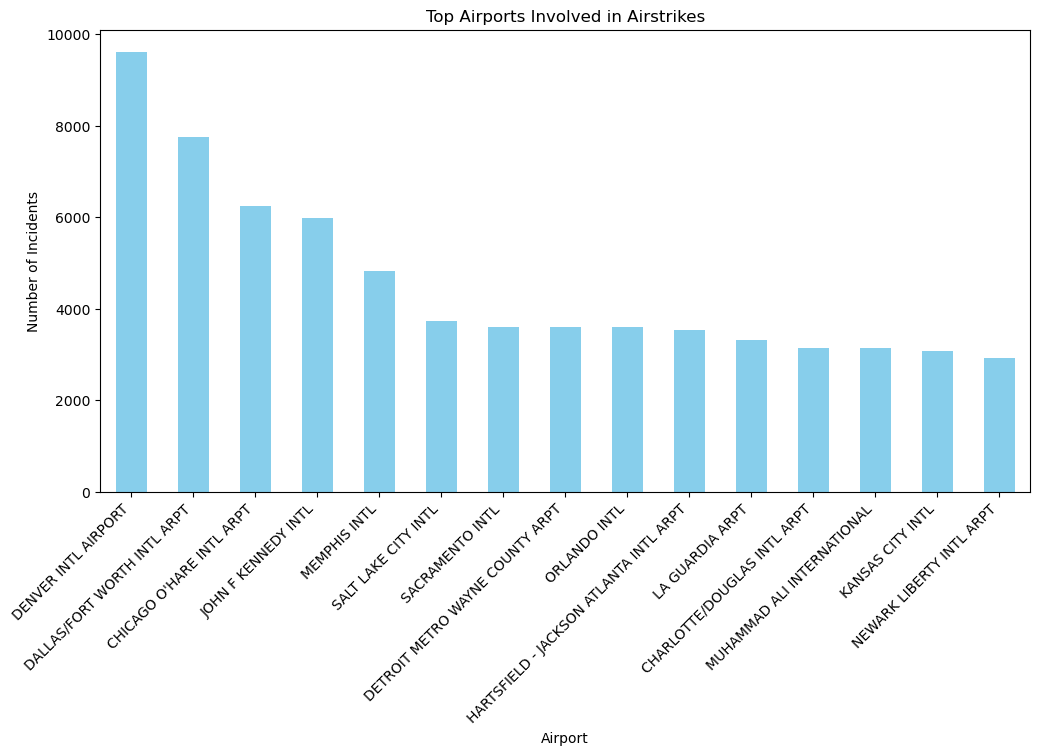

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by airport and count the number of incidents
airport_counts = pandas_df['AIRPORT'].value_counts()

# top 15
top_airports = airport_counts.head(15)

plt.figure(figsize=(12, 6))
top_airports.plot(kind='bar', color='skyblue')
plt.xlabel('Airport')
plt.ylabel('Number of Incidents')
plt.title('Top Airports Involved in Airstrikes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


##### Aircraft MASS ANALYSIS
The box plot helps to compare the distribution of damage levels across different aircraft mass categories. It provides insights into the central tendency, spread, and potential outliers in the damage level distribution for each mass category

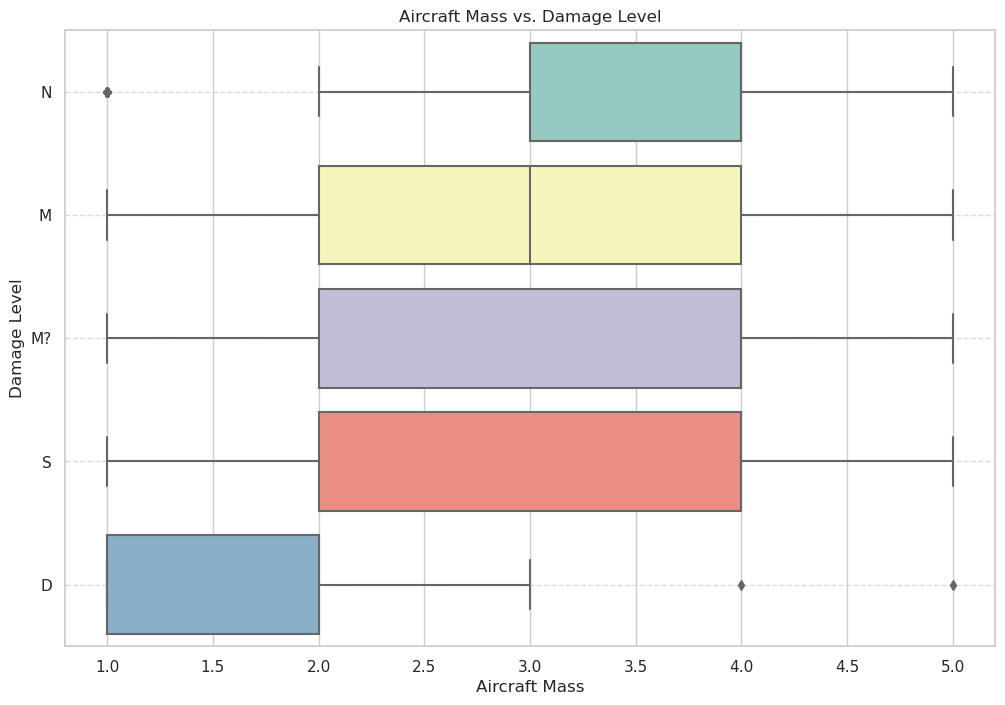

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

palette = "Set3"

# Create the box plot with Seaborn
box_plot = sns.boxplot(x='AC_MASS', y='DAMAGE_LEVEL', data=pandas_df, palette=palette)

# Set title and labels
box_plot.set_title('Aircraft Mass vs. Damage Level')
box_plot.set_xlabel('Aircraft Mass')
box_plot.set_ylabel('Damage Level')

for i, box in enumerate(box_plot.artists):
    box.set_edgecolor('black')
    box.set_facecolor('None')
    box_plot.annotate(pandas_df['AC_MASS'].unique()[i],
                      (box.get_xbox().mean(), box.get_ybox().mean()),
                      ha='center', va='center',
                      color='black', fontweight='bold', size=8)

# grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()